In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
true_morans = pd.read_parquet('true_moran.parquet')
true_morans

,shape,size,rho,data_run,moran_i,p_value
0,square,25,-0.9,0,-0.657698,0.001
1,square,25,-0.9,1,-0.654164,0.001
2,square,25,-0.9,2,-0.888529,0.001
3,square,25,-0.9,3,-0.662772,0.001
4,square,25,-0.9,4,-0.909528,0.001
...,...,...,...,...,...,...
1705,hex,400,0.9,5,0.661590,0.001
1706,hex,400,0.9,6,0.797700,0.001
1707,hex,400,0.9,7,0.629171,0.001
1708,hex,400,0.9,8,0.674816,0.001


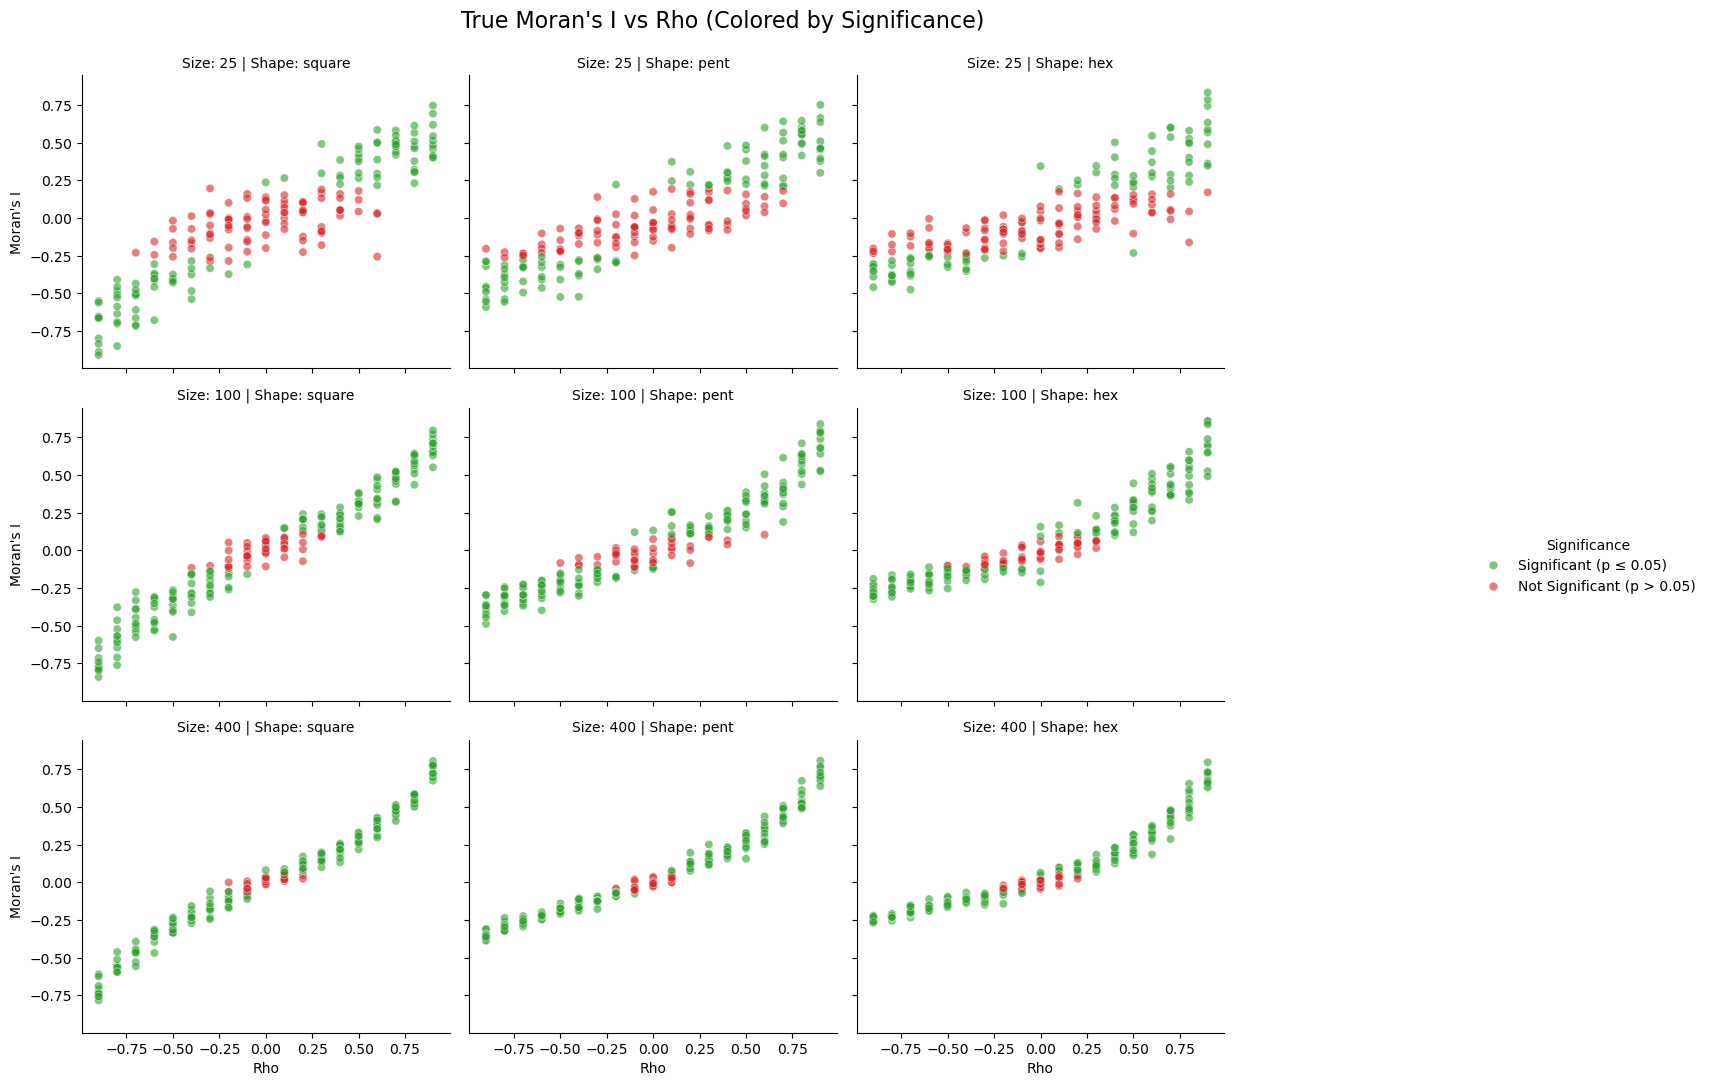

In [8]:
# 1. Create a new column to label significance
# If p-value <= 0.05, label it "Significant", otherwise "Not Significant"
true_morans['Significance'] = np.where(
    true_morans['p_value'] <= 0.05, 
    'Significant (p \u2264 0.05)', 
    'Not Significant (p > 0.05)'
)

# 2. Plot using the new column as the 'hue'
g = sns.relplot(
    data=true_morans,
    x='rho',
    y='moran_i',
    hue='Significance',
    # Use a custom dictionary to assign specific colors to each category
    palette={'Significant (p \u2264 0.05)': '#2ca02c', 'Not Significant (p > 0.05)': '#d62728'}, 
    col='shape',
    col_order=['square', 'pent', 'hex'],  
    row='size',
    row_order=[25, 100, 400],             
    kind='scatter',                       
    alpha=0.6,                            
    height=3.5,                           
    aspect=1.2                            
)

# Clean up the labels
g.set_axis_labels("Rho", "Moran's I")
g.set_titles(row_template="Size: {row_name}", col_template="Shape: {col_name}")
g.fig.suptitle("True Moran's I vs Rho (Colored by Significance)", y=1.03, fontsize=16)

# Move the legend outside the plot so it doesn't cover up your data
sns.move_legend(g, "center left", bbox_to_anchor=(1, 0.5))

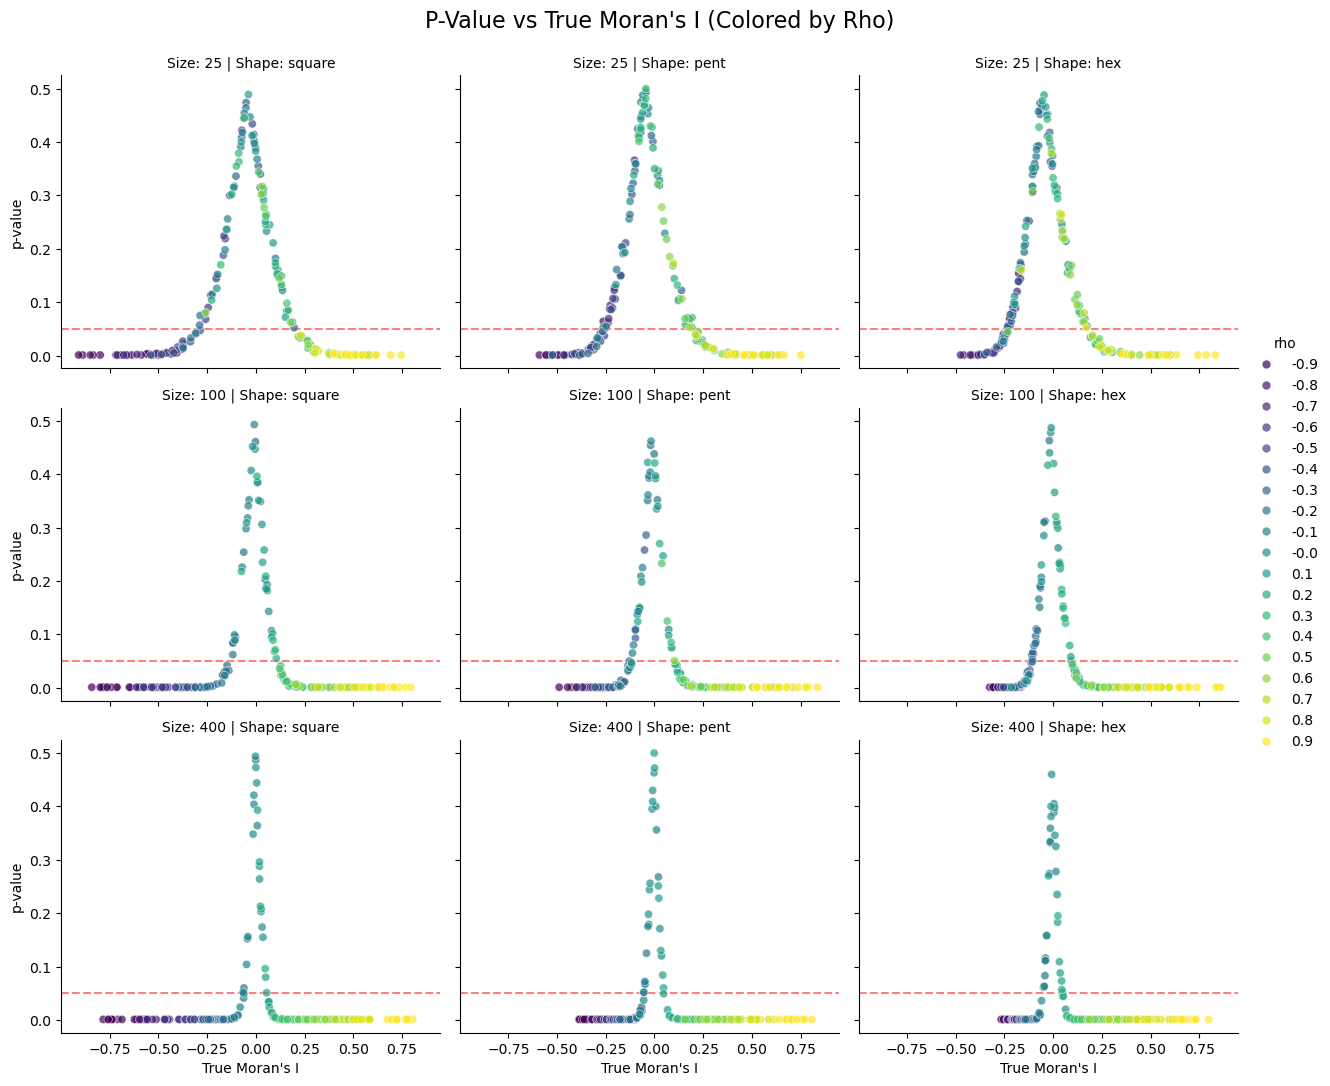

In [6]:
# Using a colormap like 'coolwarm' or 'viridis' makes the rho values pop beautifully
true_morans['rho'] = true_morans['rho'].round(1)
g = sns.relplot(
    data=true_morans,
    x='moran_i',
    y='p_value',
    hue='rho',                            
    palette='viridis',                    
    col='shape',
    col_order=['square', 'pent', 'hex'],  
    row='size',
    row_order=[25, 100, 400],             
    kind='scatter',                       
    alpha=0.7,                            
    height=3.5,                           
    aspect=1.2,
    legend='full'  # <-- The magic switch to list all 19 items!
)

# Clean up the labels
g.set_axis_labels("True Moran's I", "p-value")
g.set_titles(row_template="Size: {row_name}", col_template="Shape: {col_name}")
g.fig.suptitle("P-Value vs True Moran's I (Colored by Rho)", y=1.03, fontsize=16)

# Optional: Add the significance threshold line
for ax in g.axes.flat:
    ax.axhline(0.05, color='red', linestyle='--', alpha=0.5, zorder=0)

In [9]:
morans = pd.read_parquet('morans_i_results.parquet')
morans

,shape,size,corruption_method,rho,p_missing,corruption_run,data_run,moran_i,p_value
0,square,25,random,-0.9,5.0,0,0,-0.664540,0.001
1,square,25,random,-0.9,10.0,0,0,-0.677601,0.001
2,square,25,random,-0.9,15.0,0,0,-0.666051,0.001
3,square,25,random,-0.9,20.0,0,0,-0.694786,0.001
4,square,25,random,-0.9,25.0,0,0,-0.577562,0.001
...,...,...,...,...,...,...,...,...,...
1299595,hex,400,center,0.9,75.0,9,9,0.673896,0.001
1299596,hex,400,center,0.9,80.0,9,9,0.664584,0.001
1299597,hex,400,center,0.9,85.0,9,9,0.682769,0.001
1299598,hex,400,center,0.9,90.0,9,9,0.737686,0.001


In [26]:
# 1. Find the index of the minimum value
min_idx = morans['moran_i'].idxmin()

# 2. Retrieve the full row
min_row = morans.loc[min_idx]
min_row

shape                    pent
size                       25
corruption_method      random
rho                      -0.9
p_missing                95.0
corruption_run              6
data_run                    8
moran_i             -3.485316
p_value                 0.001
Name: 464264, dtype: object

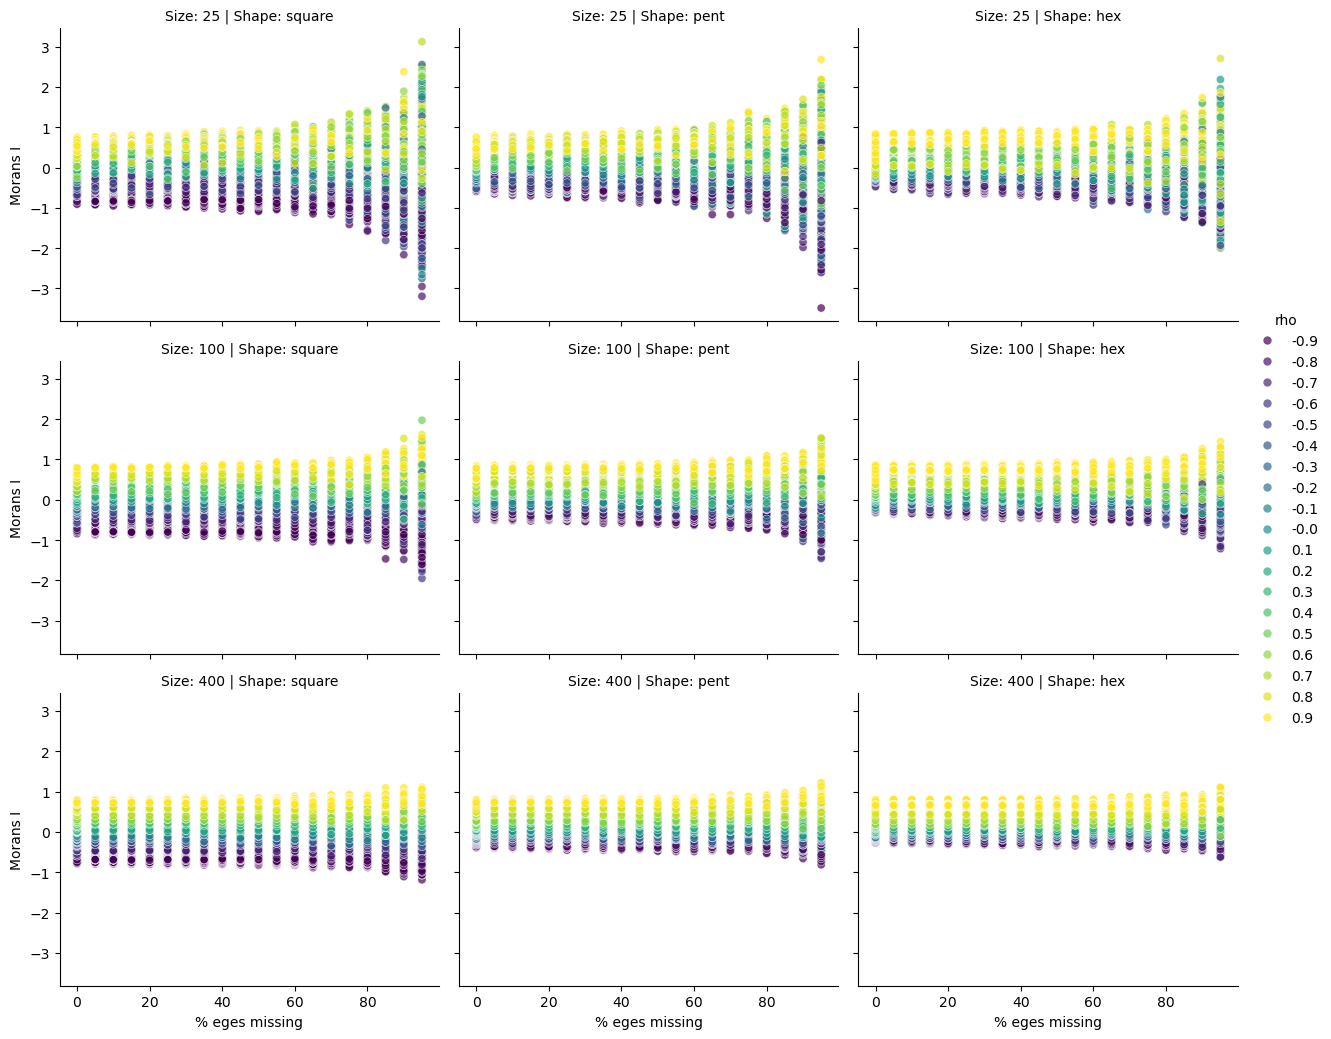

In [17]:
# 1. Prepare the 'True' data to act as p_missing = 0
true_subset = true_morans[['shape', 'size', 'rho', 'data_run', 'moran_i']].copy()
true_subset['p_missing'] = 0.0

morans['rho'] = morans['rho'].round(1)
random_morans = morans[morans['corruption_method'] == 'random']
combined = pd.concat([random_morans, true_subset], ignore_index=True)
g = sns.relplot(
    data=combined,
    x='p_missing',
    y='moran_i',
    hue='rho',                            
    palette='viridis',                    
    col='shape',
    col_order=['square', 'pent', 'hex'],  
    row='size',
    row_order=[25, 100, 400],             
    kind='scatter',                       
    alpha=0.7,                            
    height=3.5,                           
    aspect=1.2,
    legend='full'  # <-- The magic switch to list all 19 items!
)

# Clean up the labels
g.set_axis_labels("% eges missing", "Morans I")
g.set_titles(row_template="Size: {row_name}", col_template="Shape: {col_name}")
#g.fig.suptitle("P-Value vs True Moran's I (Colored by Rho)", y=1.03, fontsize=16)


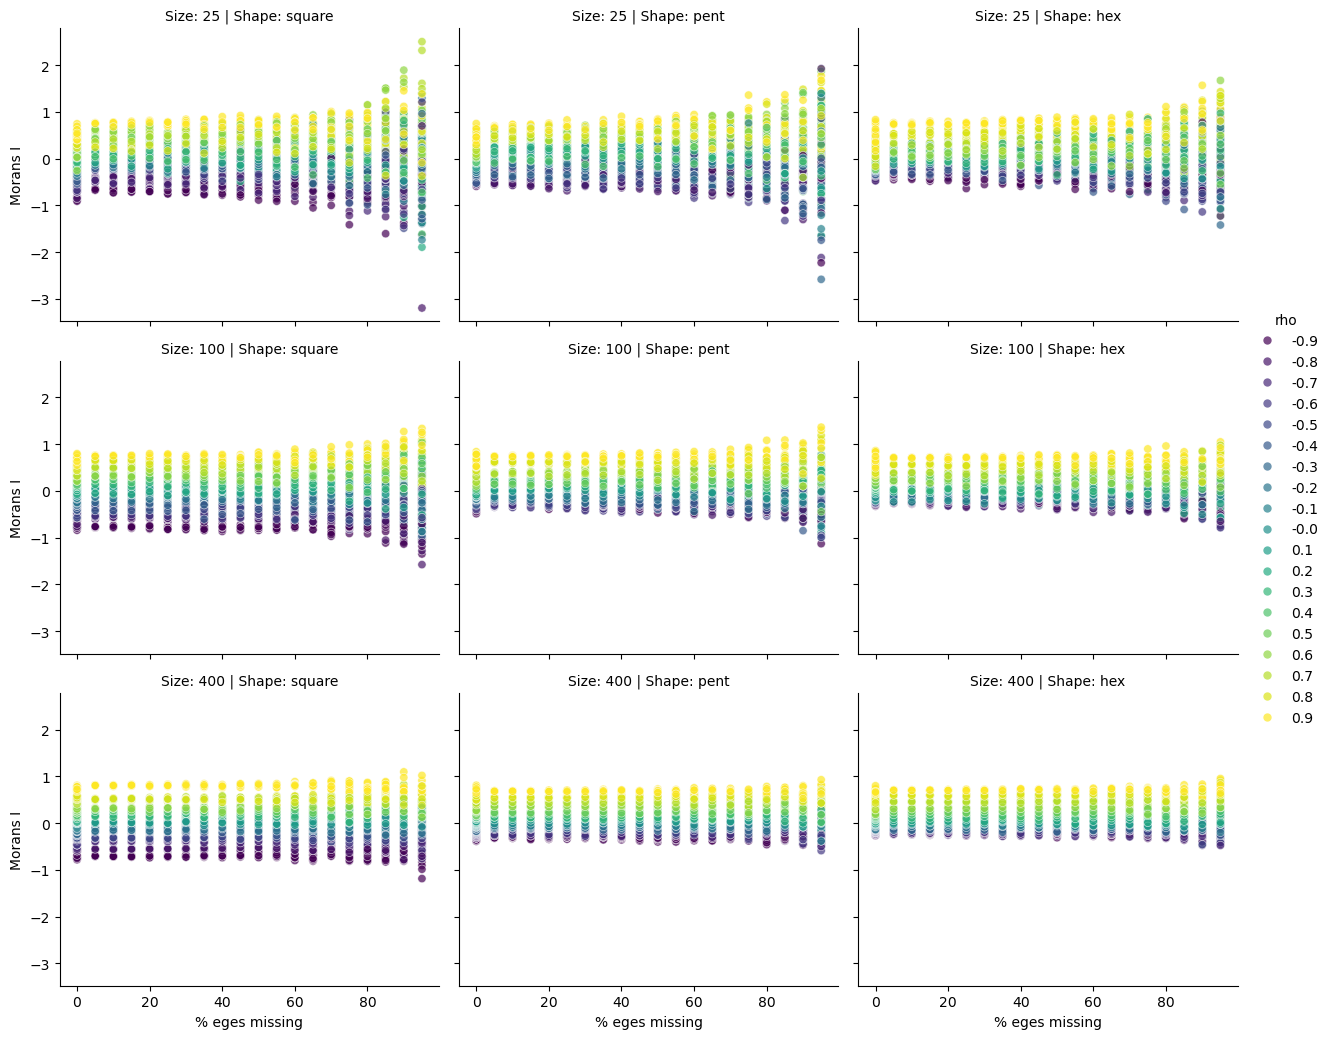

In [19]:
# 1. Prepare the 'True' data to act as p_missing = 0
true_subset = true_morans[['shape', 'size', 'rho', 'data_run', 'moran_i']].copy()
true_subset['p_missing'] = 0.0

morans['rho'] = morans['rho'].round(1)
subset = morans[(morans['corruption_method'] == 'random') & (morans['data_run'] == 0) ]
combined = pd.concat([subset, true_subset], ignore_index=True)
g = sns.relplot(
    data=combined,
    x='p_missing',
    y='moran_i',
    hue='rho',                            
    palette='viridis',                    
    col='shape',
    col_order=['square', 'pent', 'hex'],  
    row='size',
    row_order=[25, 100, 400],             
    kind='scatter',                       
    alpha=0.7,                            
    height=3.5,                           
    aspect=1.2,
    legend='full'  # <-- The magic switch to list all 19 items!
)

# Clean up the labels
g.set_axis_labels("% eges missing", "Morans I")
g.set_titles(row_template="Size: {row_name}", col_template="Shape: {col_name}")

In [20]:
len(combined)

34200